<a href="https://colab.research.google.com/github/festudillo/Google-Colab/blob/main/DS_C3_SC1_Fernando_Estudillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

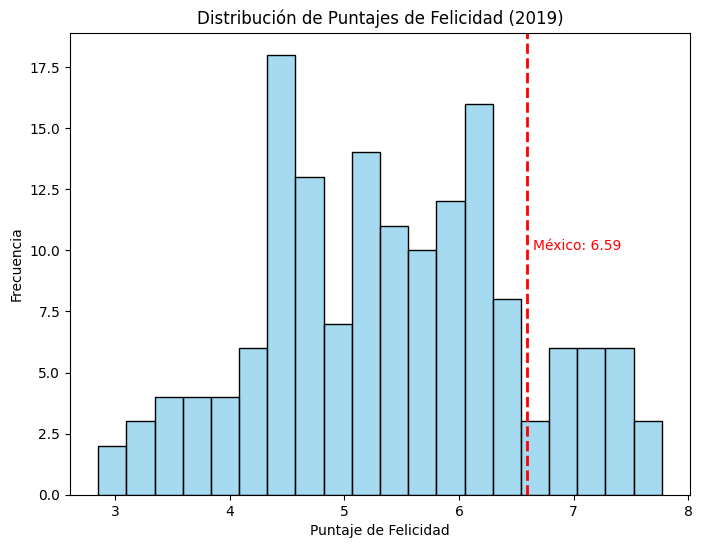

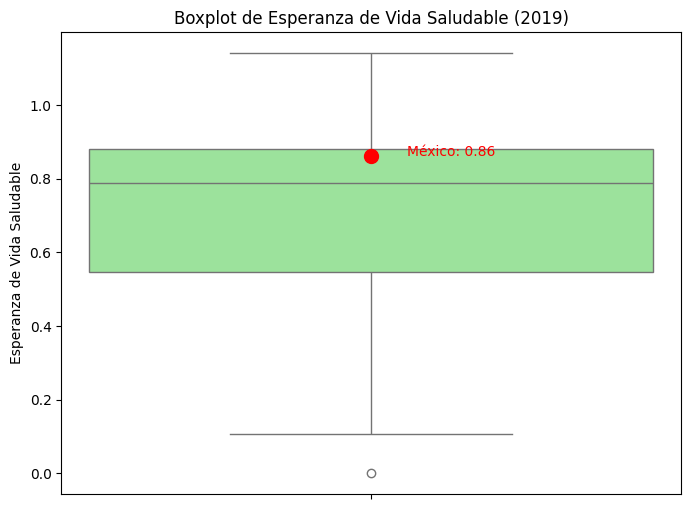

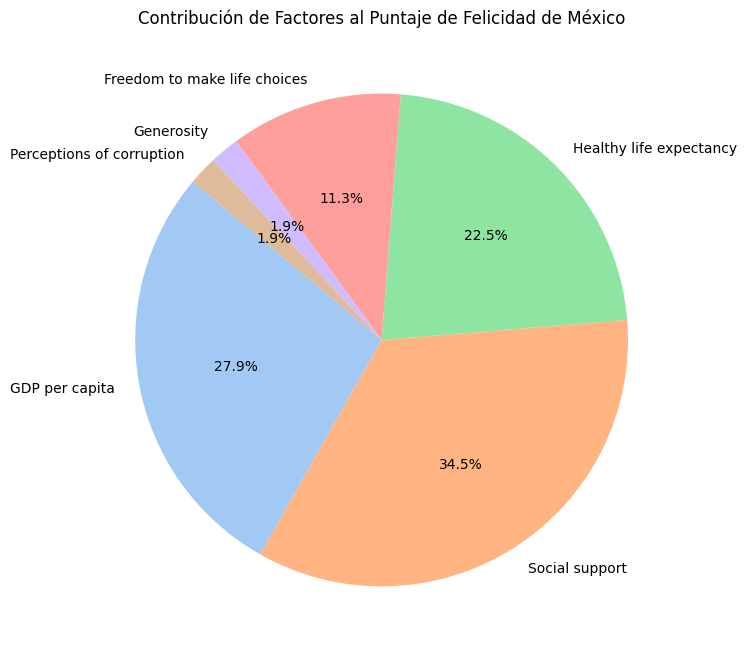

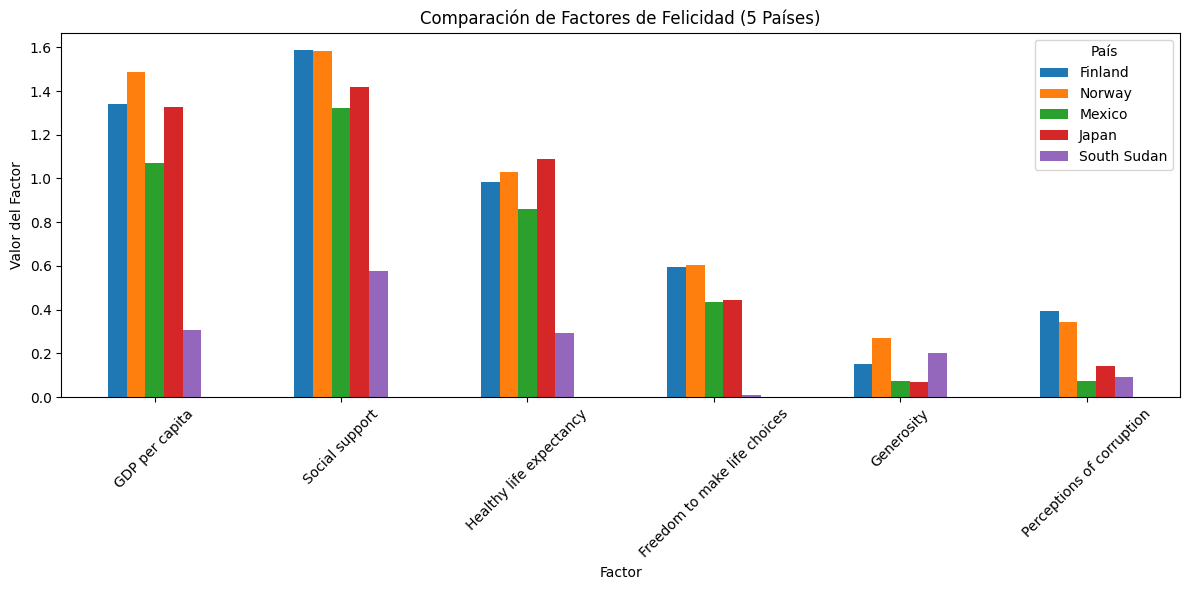

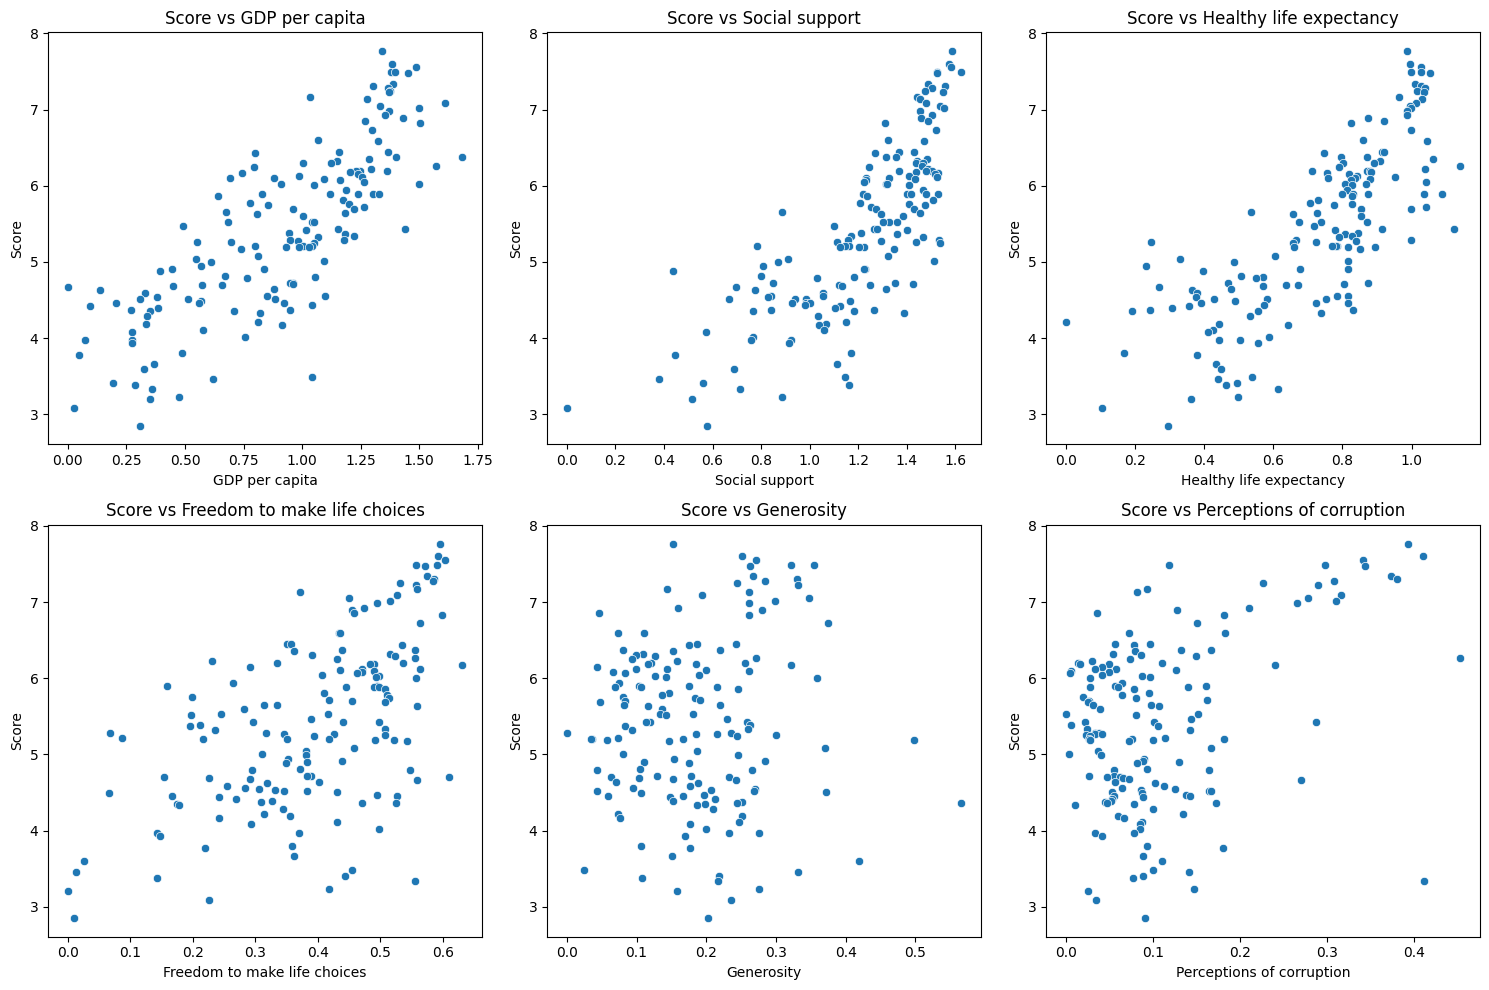

<ipython-input-1-732efab2a763>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_score.values, y=region_score.index, palette='coolwarm')


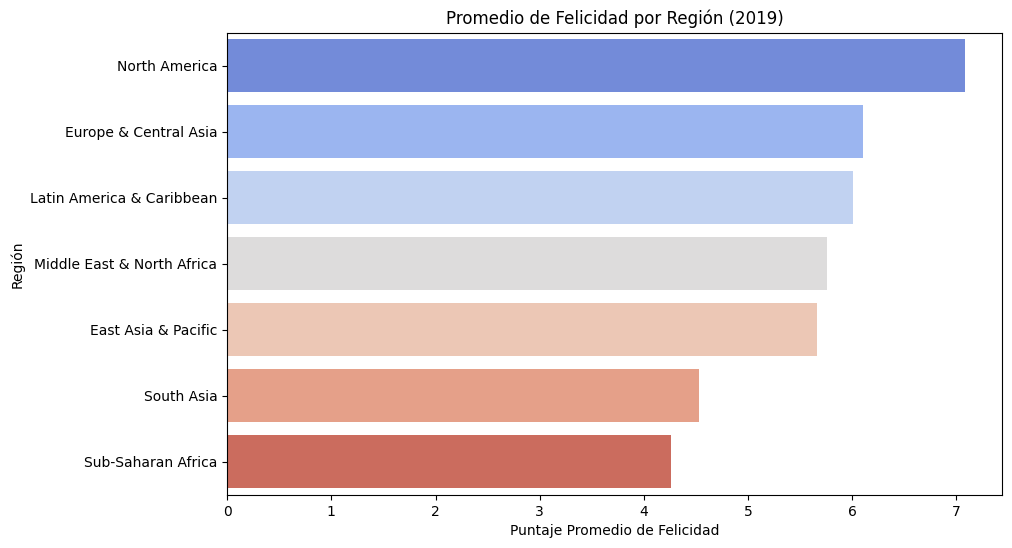

In [1]:
# ==============================================
# Análisis del Informe Mundial sobre la Felicidad 2019
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------
# 1. Cargar los datos
# ----------------------------------------------
happiness = pd.read_csv("Happiness_report.csv")
metadata = pd.read_csv("Metadata.csv")

# ----------------------------------------------
# 2. Filtrar México y establecer índice
# ----------------------------------------------
mexico = happiness[happiness["Country or region"] == "Mexico"].set_index("Country or region")

# ----------------------------------------------
# 3. Histograma del puntaje (Score) global + México
# ----------------------------------------------
mexico_score = mexico['Score'].values[0]

plt.figure(figsize=(8,6))
sns.histplot(happiness['Score'], bins=20, kde=False, color='skyblue')
plt.axvline(mexico_score, color='red', linestyle='--', linewidth=2)
plt.text(mexico_score + 0.05, 10, f'México: {mexico_score:.2f}', color='red')
plt.title('Distribución de Puntajes de Felicidad (2019)')
plt.xlabel('Puntaje de Felicidad')
plt.ylabel('Frecuencia')
plt.show()

# ----------------------------------------------
# 4. Boxplot esperanza de vida (Healthy life expectancy) + México
# ----------------------------------------------
mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]

plt.figure(figsize=(8,6))
sns.boxplot(y=happiness['Healthy life expectancy'], color='lightgreen')
plt.scatter(0, mexico_life_expectancy, color='red', s=100, zorder=5)
plt.text(0.05, mexico_life_expectancy, f'México: {mexico_life_expectancy:.2f}', color='red')
plt.title('Boxplot de Esperanza de Vida Saludable (2019)')
plt.ylabel('Esperanza de Vida Saludable')
plt.show()

# ----------------------------------------------
# 5. Gráfica circular: factores contribuyentes de México
# ----------------------------------------------
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
valores = mexico[factores].values.flatten()

plt.figure(figsize=(8,8))
plt.pie(valores, labels=factores, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Contribución de Factores al Puntaje de Felicidad de México')
plt.show()

# ----------------------------------------------
# 6. Comparar 5 países seleccionados
# ----------------------------------------------
paises = ['Finland', 'South Sudan', 'Mexico', 'Norway', 'Japan']
subset = happiness[happiness['Country or region'].isin(paises)].set_index('Country or region')
subset_factors = subset[factores].T

subset_factors.plot(kind='bar', figsize=(12,6))
plt.title('Comparación de Factores de Felicidad (5 Países)')
plt.ylabel('Valor del Factor')
plt.xlabel('Factor')
plt.legend(title='País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 7. Matriz de scatter plots: Score vs Factores
# ----------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for ax, factor in zip(axes.flatten(), factores):
    sns.scatterplot(ax=ax, data=happiness, x=factor, y='Score')
    ax.set_title(f'Score vs {factor}')
    ax.set_xlabel(factor)
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()

# ----------------------------------------------
# 8. Felicidad promedio por región (merge con metadata)
# ----------------------------------------------
merged = pd.merge(happiness, metadata, how='left', left_on='Country or region', right_on='TableName')
region_score = merged.groupby('Region')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_score.values, y=region_score.index, palette='coolwarm')
plt.title('Promedio de Felicidad por Región (2019)')
plt.xlabel('Puntaje Promedio de Felicidad')
plt.ylabel('Región')
plt.show()